Introduction: Recently, a new gold rush in the form of exo-planet hunting has seized the Internet. A major space nerd myself, I want to take the opportunity to learn as much about these distant objects as possible. What better way than to see the data for myself!

The purpose of this notebook is both an exploration and a tutorial. We will dwell into the NASA exo-planet database to understand the planet data first hand while learning the basic coding of Python for data analysis. Enjoy!

![Exoplanet](https://www.economist.com/sites/default/files/imagecache/640-width/images/2018/10/articles/main/20181006_stp003.jpg)

# Part 0: Preprocessing

## 1. Import Modules

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

<font color=MIDNIGHTBLUE>We import the important and overall basic modules for almost any data analysis task:
- Pandas lets you deal with DataFrame objects instead of computer number arrays. This will significantly improve the enjoyability of data analysis for you, as a human ;)
- Numpy is a supporting package that helps us deal with arrays and numeric calculations.
- Matplotlib and Seaborn are visualization packages. Matplotlib's code is easier to write, but season has more beautiful graphs. There are also some features that exist in one but not the other so we'll use both!</font>

## 2. Load Dataset


<font color=MIDNIGHTBLUE>The dataset was gathered on August 5th from the [Composite Data Table](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=compositepars) from NASA's exo-planet collection. </font>

In [2]:
# Use pandas's read_csv function to read in the data. The skiprows parameters help us filter out unwanted titles

df = pd.read_csv('data.csv', skiprows=range(0, 43))

In [3]:
# Look at the first 5 observations of the dataset with df.head() function

df.head()

loc_rowid fpl_hostname fpl_letter    fpl_name   fpl_discmethod  \
0          1       11 Com          b    11 Com b  Radial Velocity   
1          2       11 UMi          b    11 UMi b  Radial Velocity   
2          3       14 And          b    14 And b  Radial Velocity   
3          4       14 Her          b    14 Her b  Radial Velocity   
4          5     16 Cyg B          b  16 Cyg B b  Radial Velocity   

   fpl_controvflag  fpl_disc  fpl_orbper  fpl_smax  fpl_eccen  ...  \
0                0      2007   326.03000      1.29      0.231  ...   
1                0      2009   516.21997      1.53      0.080  ...   
2                0      2008   185.84000      0.83      0.000  ...   
3                0      2002  1773.40002      2.93      0.370  ...   
4                0      1996   798.50000      1.66      0.680  ...   

   fst_nirmagband fst_spt  fst_teff  fst_logg  fst_lum  fst_mass  fst_rad  \
0      Ks (2MASS)  K0 III    4742.0      2.31    2.243      2.70    19.00   
1      Ks (2MASS)  K4 III    4213.0      1.93    2.430      2.78    29.79   
2      Ks (2MASS)  G8 III    4813.0      2.63    1.763      2.20    11.00   
3      Ks (2MASS)    K0 V    5338.0      4.45   -0.151      0.90     0.93   
4      Ks (2MASS)  G2.5 V    5750.0      4.36    0.100      1.08     1.13   

   fst_met fst_metratio  fst_age  
0    -0.35       [Fe/H]      NaN  
1    -0.02       [Fe/H]     1.56  
2    -0.24       [Fe/H]     4.50  
3     0.41       [Fe/H]     5.24  
4     0.06       [Fe/H]     7.40  

[5 rows x 36 columns]

<font color=MIDNIGHTBLUE>The dataset contains information regarding the exo-planet found and confirmed as well as its host star. There is a wealth of information you can explore here like how a planet was discovered and what its physical characteristics and composition. It's a really fun dataset to explore! You can find the [Column Description](https://exoplanetarchive.ipac.caltech.edu/docs/API_compositepars_columns.html#planet) provided by the NASA website here. The data is divided into two sub-categories: planet parameters, which give us information about the planet and stellar column, which gives information about the host star.</font>

## 3. Briefly glimpse Data structure

In [4]:
# Look at the dimensionality of the dataset with df.shape method

df.shape

(4031, 36)

<font color=MIDNIGHTBLUE>There are a total of 4031 planets cataloged in this composite dataset, with 36 features to describe each planet.</font>

In [5]:
df.columns

Index(['loc_rowid', 'fpl_hostname', 'fpl_letter', 'fpl_name', 'fpl_discmethod',
       'fpl_controvflag', 'fpl_disc', 'fpl_orbper', 'fpl_smax', 'fpl_eccen',
       'fpl_bmasse', 'fpl_bmassprov', 'fpl_rade', 'fpl_dens', 'fpl_eqt',
       'fpl_tranflag', 'fpl_cbflag', 'fpl_snum', 'ra_str', 'ra', 'dec_str',
       'dec', 'fst_dist', 'fst_optmag', 'fst_optmagband', 'fst_nirmag',
       'fst_nirmagband', 'fst_spt', 'fst_teff', 'fst_logg', 'fst_lum',
       'fst_mass', 'fst_rad', 'fst_met', 'fst_metratio', 'fst_age'],
      dtype='object')

In [6]:
# let's rename the column to better remember what the variable mean

df.columns = ['row_id', 'host_name', 'planet_letter', 'planet_name', 'discovery_method',
             'controlversial_flag', 'discovery_year', 'orbital_period', 'orbital_smax', 'eccentricity',
             'planet_mass', 'mass_provenance', 'planet_radius', 'planet_density', 'planet_temp',
             'transit_flag', 'circumbinary_flag', 'n_stars', 'ra_str', 'ra', 'dec_str', 'dec', 'distance',
             'star_brightness', 'star_brightness_band', 'star_nir', 'star_nir_band', 'star_type', 'star_temp', 
             'star_grav', 'star_lumi', 'star_mass', 'star_radius', 'star_metallicity', 'star_met_ratio', 'star_age']

In [7]:
df.head()

row_id host_name planet_letter planet_name discovery_method  \
0       1    11 Com             b    11 Com b  Radial Velocity   
1       2    11 UMi             b    11 UMi b  Radial Velocity   
2       3    14 And             b    14 And b  Radial Velocity   
3       4    14 Her             b    14 Her b  Radial Velocity   
4       5  16 Cyg B             b  16 Cyg B b  Radial Velocity   

   controlversial_flag  discovery_year  orbital_period  orbital_smax  \
0                    0            2007       326.03000          1.29   
1                    0            2009       516.21997          1.53   
2                    0            2008       185.84000          0.83   
3                    0            2002      1773.40002          2.93   
4                    0            1996       798.50000          1.66   

   eccentricity  ...  star_nir_band star_type  star_temp  star_grav  \
0         0.231  ...     Ks (2MASS)    K0 III     4742.0       2.31   
1         0.080  ...     Ks (2MASS)    K4 III     4213.0       1.93   
2         0.000  ...     Ks (2MASS)    G8 III     4813.0       2.63   
3         0.370  ...     Ks (2MASS)      K0 V     5338.0       4.45   
4         0.680  ...     Ks (2MASS)    G2.5 V     5750.0       4.36   

   star_lumi  star_mass  star_radius  star_metallicity star_met_ratio  \
0      2.243       2.70        19.00             -0.35         [Fe/H]   
1      2.430       2.78        29.79             -0.02         [Fe/H]   
2      1.763       2.20        11.00             -0.24         [Fe/H]   
3     -0.151       0.90         0.93              0.41         [Fe/H]   
4      0.100       1.08         1.13              0.06         [Fe/H]   

   star_age  
0       NaN  
1      1.56  
2      4.50  
3      5.24  
4      7.40  

[5 rows x 36 columns]

In [8]:
# df.info() function gives us some summary information, but more importantly, the breakdown of each column. 
# This is especially useful when we look at missing data (which occurs in most real-life dataset)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4031 entries, 0 to 4030
Data columns (total 36 columns):
row_id                  4031 non-null int64
host_name               4031 non-null object
planet_letter           4031 non-null object
planet_name             4031 non-null object
discovery_method        4031 non-null object
controlversial_flag     4031 non-null int64
discovery_year          4031 non-null int64
orbital_period          3924 non-null float64
orbital_smax            2532 non-null float64
eccentricity            1529 non-null float64
planet_mass             4007 non-null float64
mass_provenance         4007 non-null object
planet_radius           4017 non-null float64
planet_density          3932 non-null float64
planet_temp             886 non-null float64
transit_flag            4031 non-null int64
circumbinary_flag       4031 non-null int64
n_stars                 4031 non-null int64
ra_str                  4031 non-null object
ra                      4031 non-null 

## 4. Missing value analysis

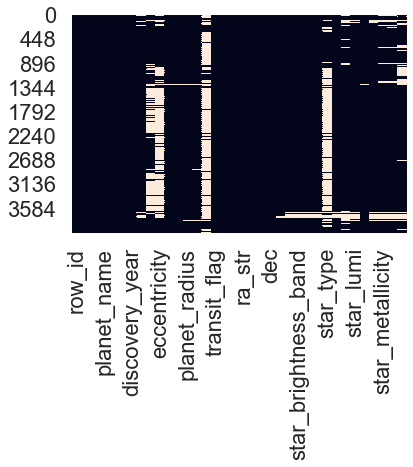

In [9]:
# the heatmap() function from seaborn is a great way to visualize the missingness of your data

sns.heatmap(df.isnull(), cbar=False)

In [10]:
# Let's see the data dimension if we drop all rows with missing value with .dropna() function

df.dropna().shape

(345, 36)

<font color=MIDNIGHTBLUE>345 observations are not really enough for analysis, especially when the inital count was over 4000. Here we have to make a trade-off between the number of data points we want and what features to include in our analysis. I personally don't find imputing data points here to be a good idea since we want to retain the integrity of the information of each and every single planet.</font>

In [11]:
# Let's drop a few columns that contain the most missing data and call our more concise dataset df_short

df_short = df.drop(['star_type', 'star_age', 'planet_temp', 'orbital_smax', 'eccentricity'], axis = 1)
df_short = df_short.dropna(axis = 0)

In [12]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 4030
Data columns (total 31 columns):
row_id                  3585 non-null int64
host_name               3585 non-null object
planet_letter           3585 non-null object
planet_name             3585 non-null object
discovery_method        3585 non-null object
controlversial_flag     3585 non-null int64
discovery_year          3585 non-null int64
orbital_period          3585 non-null float64
planet_mass             3585 non-null float64
mass_provenance         3585 non-null object
planet_radius           3585 non-null float64
planet_density          3585 non-null float64
transit_flag            3585 non-null int64
circumbinary_flag       3585 non-null int64
n_stars                 3585 non-null int64
ra_str                  3585 non-null object
ra                      3585 non-null float64
dec_str                 3585 non-null object
dec                     3585 non-null float64
distance                3585 non-null 

<font color=MIDNIGHTBLUE> We lost about 400, or 10% of our observation, a price I'm willing to pay for completeness and data integrity</font>

# Part 1. Exploratory Data Analysis

<font color=MIDNIGHTBLUE> So where are all these planets? Let's take a look at their location and coordinates. </font>

## 1. Explore the planet's location and coordinates

In [13]:
# Import functions in astropy, which is a popular data analysis package for celestial bodies

from astropy import units as u
from astropy.coordinates import SkyCoord, Distance

In [14]:
# Convert ra, dec and distance into a SkyCoord object

c = SkyCoord(ra = df_short.ra.tolist()*u.degree, 
             dec = df_short.dec.tolist()*u.degree, 
             distance = df_short.distance.tolist()*u.kpc)

<font color=MIDNIGHTBLUE> On one hand, Right Acenscion and Declination creates two surfaces, the intersection of which gives us the line of sight with the object of interest. On the other hand, distance determine the length we move from Earth in that line. With these three pieces of information, we can determine where a star-system is located. If you're curious, you can find more about this celestial coordinate system [here](https://www.skyandtelescope.com/astronomy-resources/right-ascension-declination-celestial-coordinates/) and learn to use the SkyCoord() function of astropy [here](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html).</font>

In [15]:
# Derive cartesian coordinates from the object

x = c.cartesian.x.value
y = c.cartesian.y.value
z = c.cartesian.z.value

In [16]:
# Append the coordinates to columns in our data-frame. Here df_short['column name'] automatically creates a new column 
# if the column name hasn't already existed in our dataframe.

df_short['x_cord'] = x
df_short['y_cord'] = y
df_short['z_cord'] = z

In [17]:
df_short.head()

row_id host_name planet_letter planet_name discovery_method  \
0       1    11 Com             b    11 Com b  Radial Velocity   
1       2    11 UMi             b    11 UMi b  Radial Velocity   
2       3    14 And             b    14 And b  Radial Velocity   
3       4    14 Her             b    14 Her b  Radial Velocity   
4       5  16 Cyg B             b  16 Cyg B b  Radial Velocity   

   controlversial_flag  discovery_year  orbital_period  planet_mass  \
0                    0            2007       326.03000    6165.6000   
1                    0            2009       516.21997    4684.8142   
2                    0            2008       185.84000    1525.5000   
3                    0            2002      1773.40002    1481.0878   
4                    0            1996       798.50000     565.7374   

  mass_provenance  ...  star_temp  star_grav  star_lumi  star_mass  \
0           Msini  ...     4742.0       2.31      2.243       2.70   
1           Msini  ...     4213.0       1.93      2.430       2.78   
2           Msini  ...     4813.0       2.63      1.763       2.20   
3           Msini  ...     5338.0       4.45     -0.151       0.90   
4           Msini  ...     5750.0       4.36      0.100       1.08   

   star_radius star_metallicity  star_met_ratio     x_cord     y_cord  \
0        19.00            -0.35          [Fe/H] -88.540889  -8.025563   
1        29.79            -0.02          [Fe/H] -25.586507 -29.720331   
2        11.00            -0.24          [Fe/H]  58.089078  -7.315110   
3         0.93             0.41          [Fe/H]  -5.956819 -11.492509   
4         1.13             0.06          [Fe/H]   5.782453 -12.141400   

       z_cord  
0   28.531704  
1  119.446854  
2   47.812094  
3   12.421036  
4   16.323974  

[5 rows x 34 columns]

In [18]:
# We use Plotly express to explore a 3-D representation of the coordinates

import plotly.express as px

fig = px.scatter_3d(df_short, x = 'x_cord', y = 'y_cord', z = 'z_cord',
                    hover_name = 'planet_name',
                   opacity = 0.5)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<font color=midnightblue>The 3-D representation of the planet location makes sense. Most of the exo-planets found are all around the (0,0,0) coordinate (The Earth) and a patch of sky in a particular direction (The tube-like shape of planet distribution). You can find how to create this 3D visualization [here](https://www.plotly.express/plotly_express/). I wouldn't recommend over-abusing 3-D plots since they can be very messy and inferior to 2-D plots for human visualization.
    
In the plot, it looks like the z-axis has the least variance, so we deduct that dimension on the basis of more clear visualization and the variety of 2-D tools we can use. Before that, let's visualize the distance distribution.</font>

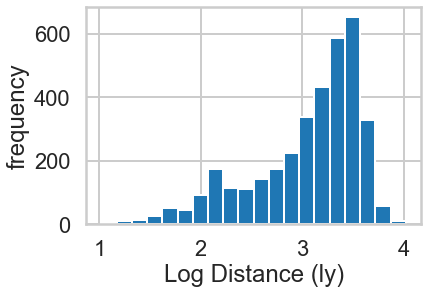

In [19]:
# Simple histogram of distance distribution

plt.hist(np.log10(df_short.distance * 3.26156), bins = 20)
plt.xlabel('Log Distance (ly)')
plt.ylabel('frequency')

plt.show()

<font color=midnightblue>It seems the furthest exo-planets we found is less than $10^4$ light years away. Since the Milky Way is thought to be [roughly 20 times that distance](https://en.wikipedia.org/wiki/Milky_Way) in diameter, we've only begun to explore so little of our galaxy, let alone others!</font>

## 2. Explore planet size

<font color=midnightblue>It seems the furthest exo-planets we found is less than $10^4$ light years away. Since the Milky Way is thought to be [roughly 20 times that distance](https://en.wikipedia.org/wiki/Milky_Way) in diameter, we've only begun to explore so little of our galaxy, let alone others!</font>

In [20]:
# We'll use Bokeh to create a visualization

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.widgets import Panel, Tabs
from matplotlib import cm
output_notebook()

Loading BokehJS ...

<font color=midnightblue>Bokeh is an awesome package to visualize data more interactively. Here, instead of drawing 5 graphs, I want to utilize the tab widget of Bokeh to create one graph in which the user can tab through. There's a lot of cool interactives you can learn to do with Bokeh. Here's a [starting point](https://realpython.com/python-data-visualization-bokeh/) if you're interested in learning more.</font>

In [21]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)


tools = "pan, wheel_zoom, undo, crosshair"

# Mars size planets
p1 = figure(tools=tools,
          title='Visualizing Exo-planets',
          x_axis_label = 'Distance in Parsec (pc)',
          y_axis_label = 'Distance in Parsec (pc)')
p1.grid.grid_line_color = None
p1.scatter('y_cord', 'z_cord', 
          source = ColumnDataSource(df_short[df_short.planet_radius <= 0.7]), 
          marker = 'circle', fill_color="orange", alpha=0.5)
p1.add_tools(
    HoverTool(
        tooltips=[('Planet Name', '@planet_name'),
                  ('Planet Mass (Em)', '@planet_mass{2.2f}'),
                 ('Planet Radius (Er)','@planet_radius{2.2f}'),
                 ('Planet Density (g/cm3)','@planet_density{2.2f}')]
    )
)
p1.circle(0,0,fill_color = 'green', alpha = 1, radius = 3)
tab1 = Panel(child=p1, title="Mars-size")

# Earth size planets
p2 = figure(tools=tools,
          title='Visualizing Exo-planets',
          x_axis_label = 'Distance in Parsec (pc)',
          y_axis_label = 'Distance in Parsec (pc)')
p2.grid.grid_line_color = None
p2.scatter('y_cord', 'z_cord', 
          source = ColumnDataSource(df_short[df_short.planet_radius.between(0.7, 1.2)]), 
          marker = 'circle',fill_color="navy", alpha=0.5)
p2.add_tools(
    HoverTool(
        tooltips=[('Planet Name', '@planet_name'),
                  ('Planet Mass (Em)', '@planet_mass{2.2f}'),
                 ('Planet Radius (Er)','@planet_radius{2.2f}'),
                 ('Planet Density (g/cm3)','@planet_density{2.2f}')]))
p2.circle(0,0,fill_color = 'green', alpha = 1, radius = 3)
tab2 = Panel(child=p2, title="Earth-size")

# Super-Earth / Mini-Neptunes    
p3 = figure(tools=tools,
          title='Visualizing Exo-planets',
          x_axis_label = 'Distance in Parsec (pc)',
          y_axis_label = 'Distance in Parsec (pc)')
p3.grid.grid_line_color = None
p3.scatter('y_cord', 'z_cord', 
          source = ColumnDataSource(df_short[df_short.planet_radius.between(1.2, 3.1)]), 
          marker = 'circle',fill_color="cyan", alpha=0.5)
p3.add_tools(
    HoverTool(
        tooltips=[('Planet Name', '@planet_name'),
                  ('Planet Mass (Em)', '@planet_mass{2.2f}'),
                 ('Planet Radius (Er)','@planet_radius{2.2f}'),
                 ('Planet Density (g/cm3)','@planet_density{2.2f}')]))
p3.circle(0,0,fill_color = 'green', alpha = 1, radius = 3)
tab3 = Panel(child=p3, title="Mega-Earth/Mini-Neptunes")


# Neptune/Sub Jupiter
p4 = figure(tools=tools,
          title='Visualizing Exo-planets',
          x_axis_label = 'Distance in Parsec (pc)',
          y_axis_label = 'Distance in Parsec (pc)')
p4.grid.grid_line_color = None
p4.scatter('y_cord', 'z_cord', 
          source = ColumnDataSource(df_short[df_short.planet_radius.between(3.1, 8.3)]), 
          marker = 'circle',fill_color="purple", alpha=0.5)
p4.add_tools(
    HoverTool(
        tooltips=[('Planet Name', '@planet_name'),
                  ('Planet Mass (Em)', '@planet_mass{2.2f}'),
                 ('Planet Radius (Er)','@planet_radius{2.2f}'),
                 ('Planet Density (g/cm3)','@planet_density{2.2f}')]))
p4.circle(0,0,fill_color = 'green', alpha = 1, radius = 3)
tab4 = Panel(child=p4, title="Neptunes/Sub-Jupyter")    

# Jupyter&Beyond

p5 = figure(tools=tools,
          title='Visualizing Exo-planets',
          x_axis_label = 'Distance in Parsec (pc)',
          y_axis_label = 'Distance in Parsec (pc)')
p5.grid.grid_line_color = None
p5.scatter('y_cord', 'z_cord', 
          source = ColumnDataSource(df_short[df_short.planet_radius >= 8.3]), 
          marker = 'circle', fill_color="red",alpha=0.5)
p5.add_tools(
    HoverTool(
        tooltips=[('Planet Name', '@planet_name'),
                  ('Planet Mass (Em)', '@planet_mass{2.2f}'),
                 ('Planet Radius (Er)','@planet_radius{2.2f}'),
                 ('Planet Density (g/cm3)','@planet_density{2.2f}')]))
p5.circle(0,0,fill_color = 'green', radius = 3)
tab5 = Panel(child=p5, title="Jupyter/Above")    

# Show tabs
tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5 ])    
    
    
show(tabs)

<font color=midnightblue>A few things stand out here:
- The planet distribution looks to be similar, with elongated shape, as the telescope only points in a small direction in the path of the sky.
- Mars-size and Earth-size planets are significantly harder to detect (due to their size), so they are under-represented in our sample.
- Mega-Earths and Mini-Neptune seems to be the most common types of planets (Which means our solar system is actually very weird because none of our planets were the average planet!).
- The distribution of Jupyter and above planets has a wide circle around the center in addition to the elongated shape. This means that because of their size, many hot giants were discovered long before we invented decent telescopes!</font>

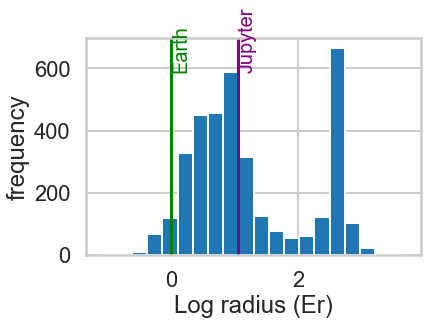

In [22]:
# Let's take a look at the entire distribution of radius. 

plt.hist(np.log(df_short.planet_radius), bins = 20)
plt.axvline(np.log10(1), ymin = 0, ymax = 1100, color = 'g', label = 'Earth')
plt.text(np.log10(1),600,'Earth',rotation=90, size = 20, color = 'g')

plt.axvline(np.log10(11.2),ymin = 0, ymax = 1100, color = 'purple', label = 'Jupyter')
plt.text(np.log10(11.2),600,'Jupyter',rotation=90, size = 20, color = 'purple')

plt.xlabel('Log radius (Er)')
plt.ylabel('frequency')

plt.show()

<font color=midnightblue> 
Note: We used log10 to normalize the data. If we didn't, our distribution would be highly skewed and hard to visualize!
    
Observations:
- Earth and Jupyter isn't the most common radius of all the exo-planets we discovered. Neither are all of the planets in our solar system. These common planets are called super-earths and mini-neptune. "Why?" is still a question that [befuddles the planetary scientists](https://planetplanet.net/2016/07/12/exactly-how-unusual-is-our-solar-system/)!

So let's take a look at some of the planets that are near earth size.
</font>

In [23]:
# Extract planets in 5% of Earth size. Here we use a boolean filter to filter planets in between 0.95 to 1.05

df_earth_like = df_short[(df_short.planet_radius >= 0.95) & (df_short.planet_radius <= 1.05)]
df_earth_like.shape

(53, 34)

In [24]:
df_earth_like.head()

row_id host_name planet_letter       planet_name discovery_method  \
104      105     K2-16             d  EPIC 201754305 d          Transit   
959      960    K2-136             b          K2-136 b          Transit   
1104    1105    K2-239             c          K2-239 c          Transit   
1189    1190     K2-32             e           K2-32 e          Transit   
1259    1260     K2-85             b           K2-85 b          Transit   

      controlversial_flag  discovery_year  orbital_period  planet_mass  \
104                     0            2019        2.715780        1.080   
959                     0            2017        7.975292        0.937   
1104                    0            2018        7.775000        0.972   
1189                    0            2019        4.348820        1.010   
1259                    0            2016        0.684533        1.010   

       mass_provenance  ...  star_temp  star_grav  star_lumi  star_mass  \
104   M-R relationship  ...     4761.0       4.63     -0.761       0.67   
959   M-R relationship  ...     4499.0       4.66     -0.788       0.74   
1104  M-R relationship  ...     3420.0       4.90     -1.796       0.40   
1189  M-R relationship  ...     5415.0       4.49     -0.488       0.86   
1259  M-R relationship  ...     4268.0       4.78     -0.837       0.57   

      star_radius star_metallicity  star_met_ratio      x_cord      y_cord  \
104          0.54            -0.33          [Fe/H] -335.887296   28.811880   
959          0.66             0.15          [Fe/H]   21.002027   50.485072   
1104         0.36            -0.10          [Fe/H]  -46.077509   16.231606   
1189         0.84            -0.02          [Fe/H]  -45.068589 -142.298947   
1259         0.51            -0.14          [Fe/H]   46.981991   79.646370   

         z_cord  
104   26.871476  
959   23.078018  
1104   3.794489  
1189 -52.983242  
1259  30.877959  

[5 rows x 34 columns]

<font color=midnightblue> 
It seems we have 53 planets fitting our criteria. Have we discovered that many earth-like world already?? Well, not necessarily, and we can prove that by looking at the distribution of some of the characteristic of these planets (Mass and orbital period. It's sad that our temperature data only has 886 observations. If it were more complete or updated, I would definitely go back and check this).
</font>

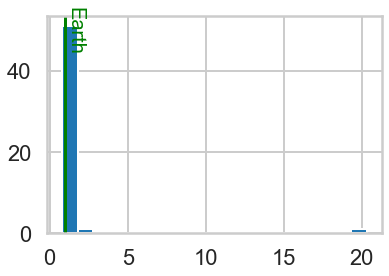

In [25]:
# Let's plot a histogram for the mass

plt.hist(df_earth_like.planet_mass, bins = 20)
plt.axvline(1, ymin = 0, ymax = 30, color = 'g', label = 'Earth')
plt.text(1,45,'Earth',rotation=270, size = 20, color = 'g')
plt.show()

<font color=midnightblue> 
It looks like we have a huge outlier that has 20 times Earth's mass and a small outlier with twice of Earth's mass even though they have similar size. Bizarre! Let's omit that planet from the distribution for now.
</font>

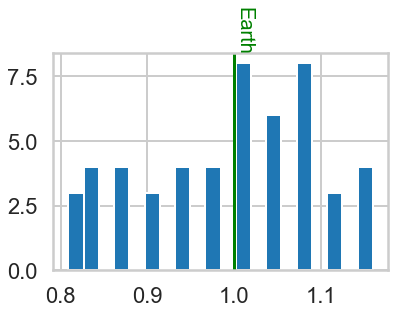

In [26]:
plt.hist(df_earth_like[df_earth_like.planet_mass < 1.5].planet_mass, bins = 20)
plt.axvline(1, ymin = 0, ymax = 30, color = 'g', label = 'Earth')
plt.text(1,8.5,'Earth',rotation=270, size = 20, color = 'g')
plt.show()

<font color=midnightblue> 
It seems apart from our two outliers, we have some relatively close mass (and thus density here). So far so good, fingers crossed, let's take a look at orbital period.
</font>

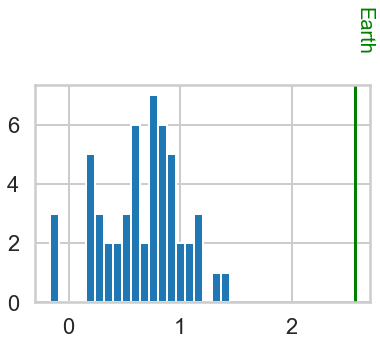

In [103]:
plt.hist(np.log10(df_earth_like.orbital_period), bins = 20)
plt.axvline(np.log10(365), ymin = 0, ymax = 30, color = 'g', label = 'Earth')
plt.text(np.log10(365),8.5,'Earth',rotation=270, size = 20, color = 'g')
plt.show()

In [28]:
# Calculate the maximum orbital period

np.max(df_earth_like.orbital_period)

28.122397

<font color=midnightblue> 
And ... immediately our hope is shattered. Out of all 53 planets, the one with the longest orbital period is 28 days (compared to the 365 long days on Earth you waited for the next Christmas). It seems all of our candidates circle dangerously close to their host star and unlikely to be life-friendly. But there two reasons why we shouldn't lose hope: 
- The reason why we have a bias towards discovering planets near their star is that it's easier. More advent technology will allow us to explore more planets (relatively) far from their host stars like the Earth is from our sun.
- A planet honestly doesn't have to be the similar size nor have close orbital period to the Earth to be habitable. There are many other factors that affect habitability. In fact, NASA has a list which keeps potentially habitable planet here.
    
    ![potentially habitable planets](http://www.hpcf.upr.edu/~abel/phl/hec2/images/HEC_All_Distance.jpeg)
    
But for now, let's put the premature enthusiasm aside to focus on more analysis.
</font>

## 3. Explore Planet Mass and Density

<font color=midnightblue> So size isn't all that matters, even for planets! In fact, I would argue that planet density is a more compelling method of cataloging planets, since it allows you a small glimpse into the possible compositions of the planet.
</font>

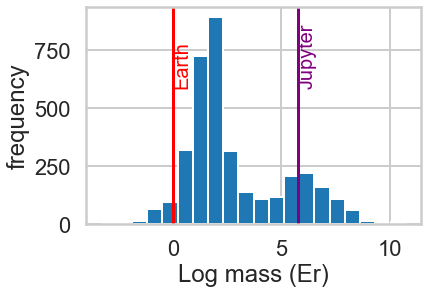

In [29]:


plt.hist(np.log(df_short.planet_density), bins = 20)
plt.axvline(np.log(1), ymin = 0, ymax = 1100, color = 'r', label = 'Earth')
plt.text(np.log(1),600,'Earth',rotation=90, size = 20, color = 'r')

plt.axvline(np.log(318.2),ymin = 0, ymax = 1100, color = 'purple', label = 'Jupyter')
plt.text(np.log(318.2),600,'Jupyter',rotation=90, size = 20, color = 'purple')

plt.xlabel('Log mass (Er)')
plt.ylabel('frequency')

plt.show()

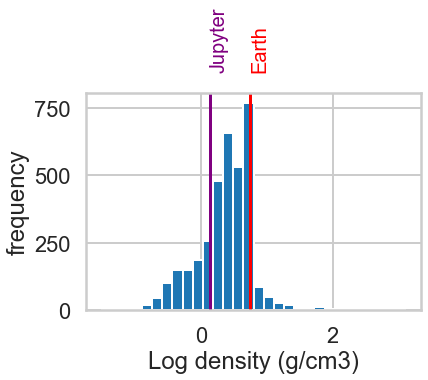

In [30]:
# Let's draw out our favorite graph, the histogram

plt.hist(np.log10(df_short.planet_density), bins = 30)
plt.axvline(np.log10(5.51), ymin = 0, ymax = 1100, color = 'r', label = 'Earth')
plt.text(np.log10(5.51),900,'Earth',rotation=90, size = 20, color = 'r')

plt.axvline(np.log10(1.33), ymin = 0, ymax = 1100, color = 'purple', label = 'Jupyter')
plt.text(np.log10(1.33),900,'Jupyter',rotation=90, size = 20, color = 'purple')

plt.xlabel('Log density (g/cm3)')
plt.ylabel('frequency')

plt.show()

<font color=midnightblue> Observations:
- Jupyter is way more dense than the Earth because it mostly consist of its atmosphere (lighter air) whereas a terrestial planet like the Earth are rocky and heavier
- Earth's density is around the most common type, though I suspect because of the large a mount of super-earths which exists
- Beyond earth density is very tough for planet formation
- The distribution is very normal like comparing to the mass and radius distribution. This suggests that planets often grow massive and sizeable by acquiring a huge atmosphere and lowering their density. Thus, the gas giants's density remain low.
</font>

## 4.Explore Discovery Method & Discovery Year

<font color=midnightblue>
For exploration of the discovery method and discover year, we will use the entire dataset since there will be no missing values.
</font>

In [88]:
# We utilize the function value_counts() to count the occurance of all the values in an array

df.discovery_method.value_counts()

Transit                          3100
Radial Velocity                   762
Microlensing                       78
Imaging                            47
Transit Timing Variations          18
Eclipse Timing Variations          11
Pulsar Timing                       6
Orbital Brightness Modulation       6
Pulsation Timing Variations         2
Astrometry                          1
Name: discovery_method, dtype: int64

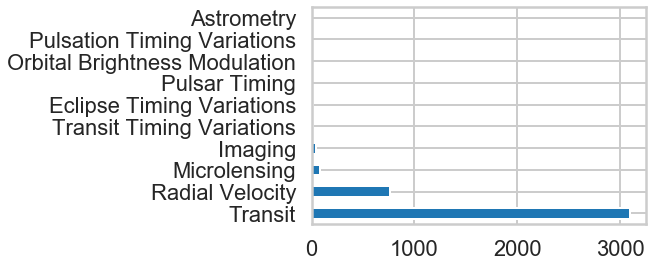

In [92]:
# We use a simple bar plot to visualize

df.discovery_method.value_counts().plot('barh')
plt.show()

<font color=midnightblue>
It seems that most planets are discovered by the Transit and the Radial Velocity method. However, there are many other methods which could be employed to discover a planet. We will take a look at the inner workings of some of these methods
</font>

### Transit (Photometry)

<font color=midnightblue> Planets are very hard to see due to their tiny size and the overwhelming radiation by their host star obscurring signals from the planet. However, we can search for planets indirectly. The [Transit Method](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/#/2) looks for small periodic dip in brightness in the star as a planet is transiting through the star. This is analogous to looking for the planet's shadows in the background star. The bigger the brightness dip, the bigger the planet should be.</font>


![Transit](https://www.iac.es/proyecto/tep/fig1moda.gif)

### Radial Velocity 

<font color=midnightblue> We often think the Earth and other planets revolve around the Sun, but that's not technically true. The Sun and all the planets revolve around a mutual center of mass of the solar system. What that means is that the Sun does not stay still, but wobbles due to the planet's graviational influence. The [Radial Velocity method](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/#/1)  relies on detecting a wobble in the star's position to infer a gravitationally significant object (a planet) around it. Detecting a wobble with direct imaging is very difficult, since the center of mass of the system is often within the star itself. However, we can use use the doppler shift to identify if the star is moving from and away from us in a periodic way and infer a wobble.</font>


![Radial Velocity](http://obswww.unige.ch/~udry/planet/Images/doppler.jpg)

### Gravitional Micro Lensing

<font color=midnightblue>Another way in which gravity can be used as a detection method is the way in which it bends light (called [Gravitational Micro Lensing](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/#/4)). If an area of the sky bends the light of a background star or cluster into shapes or sub-shapes of an [Einstein Ring](https://en.wikipedia.org/wiki/Einstein_ring), this signifies a gravitationally intensive object, such as a planet, in the way. Here is a really intuitive [explanation video](https://www.youtube.com/watch?v=emNAxv8_aXU) from those who actually does the detection</font>


<img src=https://www.universetoday.com/wp-content/uploads/2017/12/lensshoe_hubble_900.jpg width="500">

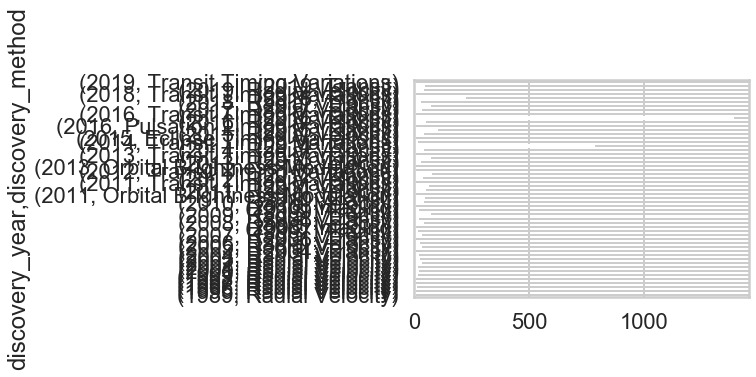

In [132]:
df_short.groupby(['discovery_year', 'discovery_method']).count().row_id.plot(kind = 'barh', stacked= True)

## 5. Explore correlated variables

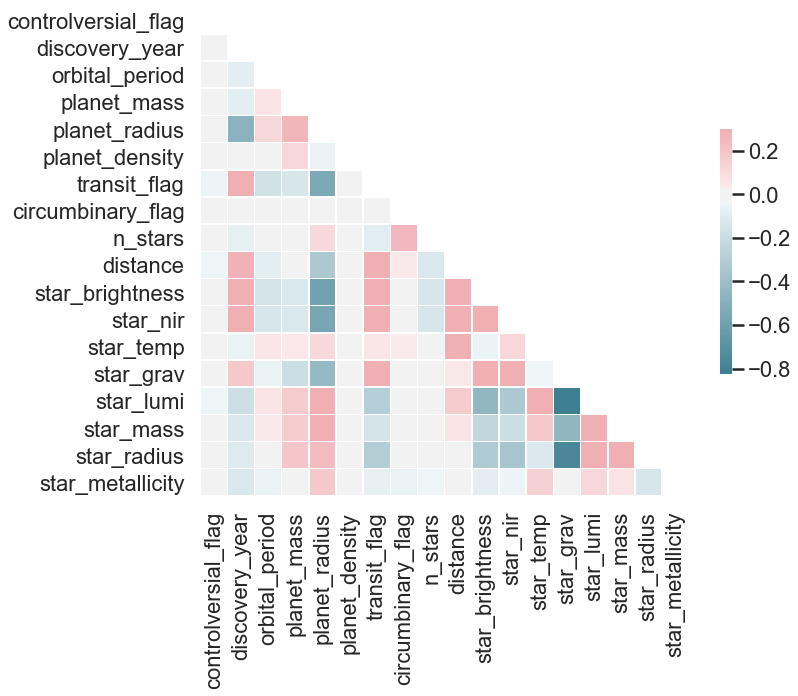

In [32]:
# Compute the correlation matrix
corr = df_short.drop(['row_id', 'x_cord', 'y_cord', 'z_cord', 'ra', 'dec'], 
                     axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [33]:
from scipy.stats import pearsonr

In [34]:
coef, _ = pearsonr(df_short.planet_radius, df_short.discovery_year)
coef

-0.47761703671574735

In [35]:
coef, _ = pearsonr(df_short.star_brightness, df_short.planet_radius)
coef

-0.5856895184043444

<font color=purple> A few observations:
- We care about strongly correlated variables (those with correlation co-efficient absolute value of above 0.4)
    - The planet_radius vs discovery_year pair has a pearson-coef of appx. -0.48. This means that we are somewhat likely to see large planets in ealier years. This is definitely an availability bias, as only large planets were available to see for the telescopes of early years of space exploration
    - The planet_radius vs transit_flag negative correlation is also interesting. Transit Flag is a flag for if the planet transits its hosts stars. Here it seems to be the case that if we can identify planets using the transit technique, the planet needs to be big enough to block out enough portion of the star-light so we can see its brightness dip.
    - The planet_radius vs star_brightness negative correlation seems to indicate the bias that we've only discovered large planets in stars with low brightness. 
    - The star_radius and star_gravity strongly negative correlation may seems counter intuitive at first, but as I've discovered, when a star is big, even though it has likely higher mass, the surface will be further away from the center of mass. Since gravity is inv to distance squared and only prop to mass
The correlation plot gives us 
</font>

<font color=purple> A few observations:
- We see a very similar distribution to radius. This range typifies how big planets can get.
- Also, if we adjust for selection bias (larger planets are more likely to be seen), the mass frequency is likely to regress to a normal distribution.
</font>